<h3>
<br>
<center>Jimi Togni - RA: 226359 <br> Rodrigo de Freitas Pereira -  RA: 192063 </center>
<br><br>

<h3>
<center>Parte II – Classificação binária com redes MLP e SVMs
<br></center>
</h3>


Utilizando MLP, testou-se dois métodos de estimação: batch e online, dentre eles, pode-se observar que a melhor acurácia e também, convergiu mais rapidamente, em comparação ao batch, ocorreu quando usou-se o método de estimação batch, com as configurações: 
<br>
<ul>
<li>Épocas = 200.
<li>Camada oculta com 50 neurônios, com função de ativação ReLU.
<li>Entropia cruzada para a função custo.
<li>Os parâmetros foram calculadas utilizando o método Adam.
</ul>
<br>
Onde observou-se que o melhor resultado foi 86% de acurácia nos testes, utilizando a validação cruzada nos testes de validação, foram testados os valores 5, 10, 15, 30, 50 para a camada oculta, a que apresentou o melhor resultado foi a rede com 50 neurônios, resultado esse, pouco melhor do que quando utilizado o valor de 30 neurônios para a camada oculta, o resultado pode ser visto na figura 1.

<img src="./imagens/melhor_resultado_val.png">
<center>Figura 1: Curva de aprendizado.</center>


Na figura 3, é possível analisar melhor as regiões de decisão e as classes de cada amostra, bastante parecida com a figura mostrada no enunciado utilizando o estimador MAP

<img src="./imagens/regioes_decisao_png">
<center>Figura 2: Regiões de decisão e classes</center>
<br><br>
SVM - foi utilizada a biblioteca sklearn.svm para as máquinas de vetores de suporte, os hiperparâmetros foram escolhidos com validação cruzada, igual feito no MLP.

O melhor resultado obtido com nos testes foi com o kernel RBF e taxa de penalidade do erro = 50, a melhor acurácia foi de 0.867, o gráfico plotado pode ser visto na figura 3

<img src="./imagens/svm_rbf_50.png">
<center>Figura 3: SVM com kernel rbf e penalização do erro =50</center>

Para penalização (C) utilizou-se 1, 10, 50, 100
Os kernels testados foram 'linear', 'poly', 'rbf', 'sigmoid'
No código, pode-se observar os resultados quando utilizado kernel linear, porém, o modelo não é capaz de classificar satisfatoriamente os dados



In [79]:
import gc

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_decision_regions

import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.optimizers import SGD, RMSprop, Adam

%matplotlib inline

Using TensorFlow backend.
/home/jimitogni/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jimitogni/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jimitogni/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jimitogni/.local/lib/python3.7/site-packages/tenso

In [ ]:
'''os.mkdir('./dados')
os.mkdir('./imagens')'''

In [ ]:
'''pst_imagens = os.path.abspath(os.path.relpath('./imagens'))
pst_dados = os.path.abspath(os.path.relpath('./dados'))

#dados_treino = 'http://www.dca.fee.unicamp.br/~lboccato/dados_treinamento.mat'
#dados_validacao = 'http://www.dca.fee.unicamp.br/~lboccato/dados_val.mat'
#dados_teste = 'http://www.dca.fee.unicamp.br/~lboccato/dados_teste.mat'


urllib.request.urlretrieve(dados_treino, os.path.join(pst_dados, 'dados_treinamento.mat'))
urllib.request.urlretrieve(dados_validacao, os.path.join(pst_dados, 'dados_val.mat'))
urllib.request.urlretrieve(dados_teste, os.path.join(pst_dados, 'dados_teste.mat'))'''

In [27]:
treinamento = scipy.io.loadmat("./dados/dados_treinamento.mat")
validacao = scipy.io.loadmat("./dados/dados_val.mat")
teste = scipy.io.loadmat("./dados/dados_teste.mat")


In [139]:
x_treino = pd.DataFrame(treinamento["X"]).astype('float32')
y_treino = np.array(treinamento["y"]).ravel().astype('float32')
y_treino_view = y_treino
y_treino = pd.get_dummies(y_treino)

x_validacao = pd.DataFrame(validacao["Xval"]).astype('float32')
y_validacao = np.array(validacao["yval"]).ravel().astype('float32')
y_validacao_view = y_validacao
y_validacao = pd.get_dummies(y_validacao)

x_teste = pd.DataFrame(teste["Xt"]).astype('float32')
y_teste = np.array(teste["yt"]).ravel().astype('float32')
y_teste_view = y_teste
y_teste = pd.get_dummies(y_teste)

x_min, x_max = x_teste.to_numpy()[:, 0].min() - 1, x_teste.to_numpy()[:, 0].max() + 1
y_min, y_max = x_teste.to_numpy()[:, 1].min() - 1, x_teste.to_numpy()[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))


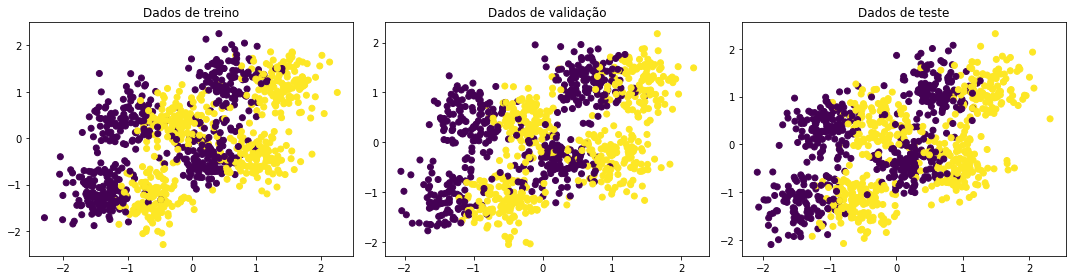

In [81]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title("Dados de treino")
plt.scatter(x_treino.to_numpy()[:, 0], x_treino.to_numpy()[:, 1], c=y_treino_view)

plt.subplot(1, 3, 2)
plt.title("Dados de validação")
plt.scatter(x_validacao.to_numpy()[:, 0], x_validacao.to_numpy()[:, 1], c=y_validacao_view)

plt.subplot(1, 3, 3)
plt.title("Dados de teste")
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view)

plt.tight_layout()
plt.savefig(('./imagens/dados_or.png'), bbox_inches='tight')
plt.show()

In [ ]:
'''plt.plot(X_treino[np.in1d(y_treino, 1), 0], X_treino[np.in1d(y_treino, 1), 1], 'rX')
plt.plot(X_treino[np.in1d(y_treino, 0), 0], X_treino[np.in1d(y_treino, 0), 1], 'o')
plt.savefig(('./imagens/dados_treino.png'), bbox_inches='tight')
plt.title("Dados de treino")
plt.show()

plt.plot(X_val[np.in1d(y_val, 1), 0], X_val[np.in1d(y_val, 1), 1], 'rX')
plt.plot(X_val[np.in1d(y_val, 0), 0], X_val[np.in1d(y_val, 0), 1], 'o')
plt.savefig(('./imagens/dados_val.png'), bbox_inches='tight')
plt.title("Dados de Validação")
plt.show()

plt.plot(X_teste[np.in1d(y_teste, 1), 0], X_teste[np.in1d(y_teste, 1), 1], 'rX')
plt.plot(X_teste[np.in1d(y_teste, 0), 0], X_teste[np.in1d(y_teste, 0), 1], 'o')
plt.savefig(('./imagens/dados_teste.png'), bbox_inches='tight')
plt.title("Dados de Teste")
plt.show()'''

## Aplicando a MLP

##### usando batch

In [149]:
md = MLPClassifier(**{
    'activation': 'relu', 
    'hidden_layer_sizes': (100, ), #merlhor 100
    'learning_rate': 'constant', 
    'learning_rate_init': 1e-4, #merlhor 3
    'batch_size': 36, #merlhor 32
    'max_iter': 1000, #merlhor 1000
    'solver': 'adam',
    'random_state': 1
})
md.fit(x_treino, y_treino_view)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=36, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.0001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Acurácia:
87.6%

Classification report:
              precision    recall  f1-score   support

          C1       0.87      0.89      0.88       499
          C2       0.88      0.87      0.88       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



(1.5, -0.5)

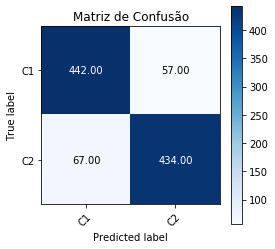

In [150]:
y_pred = md.predict(x_teste)
print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_teste_view, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_teste_view, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

In [154]:
mlp = MLPClassifier(max_iter=500)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [155]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_treino, y_treino_view)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=500,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alph

In [156]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print("")

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.665 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}

0.871 (+/-0.039) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}

0.664 (+/-0.033) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}

0.866 (+/-0.034) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}

0.668 (+/-0.029) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}

0.879 (+/-0.041) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'sol

In [157]:
y_true, y_pred = y_teste_view , clf.predict(x_teste)

from sklearn.metrics import classification_report

print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

        -1.0       0.86      0.91      0.88       499
         1.0       0.91      0.85      0.88       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



Acurácia:
87.6%

Classification report:
              precision    recall  f1-score   support

          C1       0.87      0.89      0.88       499
          C2       0.88      0.87      0.88       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



(1.5, -0.5)

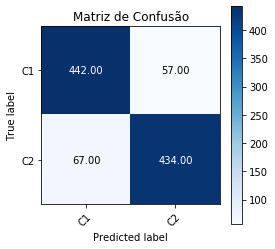

In [158]:
y_pred = md.predict(x_teste)
print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_true, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

### Resultados usando


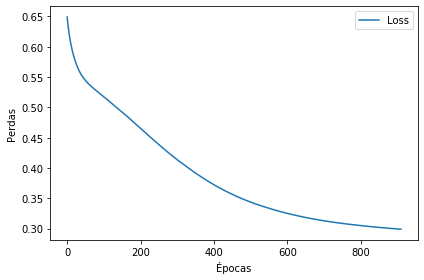

In [159]:
plt.plot(md.loss_curve_, label="Loss")
plt.legend()
plt.xlabel("Épocas")
plt.ylabel("Perdas")
plt.tight_layout()
plt.show()

### Fronteiras de decição

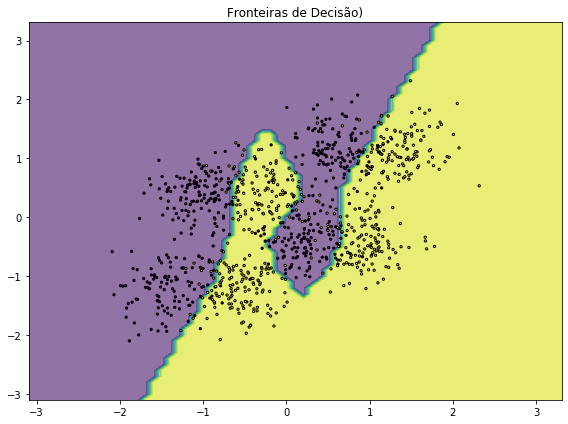

In [177]:
Z = md.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.title("Fronteiras de Decisão)")
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(x_teste.to_numpy()[:, 0], x_teste.to_numpy()[:, 1], c=y_teste_view, s=5, edgecolor='k')
plt.tight_layout()
plt.show()

In [190]:
#optimizer = SGD(lr=1e-4, momentum=0.9, nesterov=True)
#optimizer = RMSprop(lr=1e-4)
optimizer = Adam(lr=1e-4, amsgrad=False)

model = Sequential(name="Multi Layer Perceptron")
model.add(Dense(units=100, activation='relu', input_dim=2, name="Input_Layer"))
model.add(Dense(units=2, activation='softmax', name="Output_Layer"))
model.compile(loss=categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

print()
print("_" * 65)
print("Optimizer: ")
for key, value in optimizer.get_config().items():
    try:
        value = np.round(value, 5)
    except:
        pass
    print(f"- {key}: {value}")

Model: "Multi Layer Perceptron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 100)               300       
_________________________________________________________________
Output_Layer (Dense)         (None, 2)                 202       
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________
None

_________________________________________________________________
Optimizer: 
- learning_rate: 0.0001
- beta_1: 0.9
- beta_2: 0.999
- decay: 0.0
- epsilon: 0.0
- amsgrad: False


In [191]:
history = model.fit(x_treino, y_treino,
                    epochs=300,
                    batch_size=28,
                    shuffle=True,
                    verbose=False,
                    validation_data=(x_validacao, y_validacao))

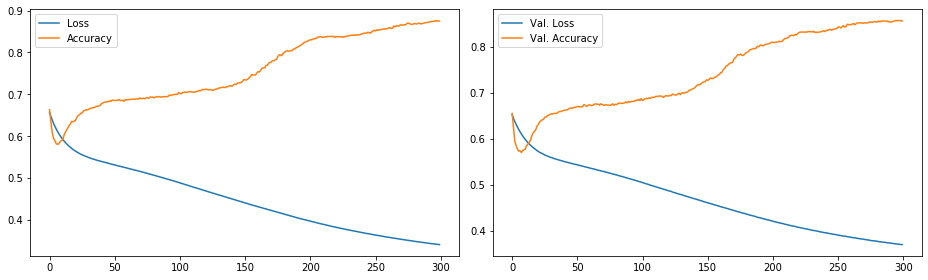

In [192]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"], label="Val. Loss")
plt.plot(history.history["val_accuracy"], label="Val. Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

Acurácia:
88.2%

Classification report:
              precision    recall  f1-score   support

          C1       0.87      0.89      0.88       499
          C2       0.89      0.87      0.88       501

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



(1.5, -0.5)

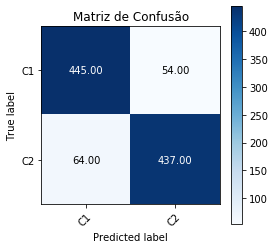

In [181]:
y_pred = np.argmax(model.predict(x_teste, batch_size=32), axis=1)
y_pred[y_pred == 0] = -1

print("Acurácia:")
print(f"{np.mean(y_pred == y_teste_view) * 100}%")
print()
print("Classification report:")
print(classification_report(y_teste_view, y_pred, target_names=["C1", "C2"]))

labels = ["C1", "C2"]
cfm = confusion_matrix(y_teste_view, y_pred)

plt.figure(figsize=(4, 4))
ax = plt.subplot(1, 1, 1)
im = plt.imshow(cfm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cfm.shape[1]),
       yticks=np.arange(cfm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=labels, yticklabels=labels,
       title="Matriz de Confusão",
       ylabel='True label',
       xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
thresh = cfm.max() / 2.
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(j, i, format(cfm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cfm[i, j] > thresh else "black")
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(1.5, -0.5)

In [72]:
'''classes = 1 
dim_entrada = 2
epocas = 10000
passagens = 1000

X_treino_tmp = torch.tensor(X_treino, dtype=torch.float)
y_treino_tmp = torch.tensor(y_treino, dtype=torch.float)

X_val_tmp = torch.tensor(X_val, dtype=torch.float)
y_val_tmp = torch.tensor(y_val, dtype=torch.float)

X_teste_tmp = torch.tensor(X_teste, dtype=torch.float)
y_teste_tmp = torch.tensor(y_teste, dtype=torch.float)'''

In [74]:
for H in [5, 10, 15, 30, 50]:
    print("H = ", H)
    perdas_treino = []
    perdas_val = []
    
    modelo = torch.nn.Sequential(torch.nn.Linear(dim_entrada, H), torch.nn.ReLU(), torch.nn.Dropout(0.5), 
                                                torch.nn.Linear(H, classes),
                                                torch.nn.Sigmoid(),
    )
    
    otimizador = optim.Adam(modelo.parameters())
    
    for epoca in range(epocas):
        modelo.train()
        otimizador.zero_grad()
        saida = modelo(X_treino_tmp)
        perda = F.binary_cross_entropy(saida, y_treino_tmp)
        perda.backward()
        otimizador.step()
        perdas_treino.append(perda)
        
        modelo.eval()
        with torch.no_grad():
            saida = modelo(X_val_tmp)
            perda_validacao = F.binary_cross_entropy(saida, y_val_tmp)
        predicao = np.where(saida<0.5,0,1)
        correcao = y_val_tmp.eq(torch.tensor(predicao, dtype=torch.float)).sum()
        perdas_val.append(perda_validacao)
        if epoca % passagens == 0:
            print('Dados de validação: Avg. loss: {:.4f}, Acurácia: {}/{} ({:.0f}%)'.format(
            perda_validacao, correcao, len(y_val),
            100. * correcao / len(y_val)))
        gc.collect()

    
    plt.plot(perdas_treino, color='blue')
    plt.plot(perdas_val, color='red')
    plt.legend(["treino", "validação"])
    plt.yscale("log")
    plt.title('Curva de aprendizado com {} neuronios na camada oculta'.format(H))
    plt.xlabel('Exemplos de treino vistos pelo modelo')
    plt.ylabel('Entropia cruzada')
    plt.savefig(os.path.join(pst_imagens, 'curva_bath{}.png'.format(H)), bbox_inches='tight')
    plt.show()

H =  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Using a target size (torch.Size([1000, 2])) that is different to the input size (torch.Size([1000, 1])) is deprecated. Please ensure they have the same size.


ValueError: Target and input must have the same number of elements. target nelement (2000) != input nelement (1000)

#### online (padrão-a-padrão)

In [75]:
epocas = 200
passagens = 20

for H in [5, 10, 15, 30, 50]:
    print("H = ", H)
    perdas_treino = []
    perdas_val = []
    
    modelo = torch.nn.Sequential(
        torch.nn.Linear(dim_entrada, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, classes),
        torch.nn.Sigmoid(),
    )
    
    otimizador = optim.Adam(modelo.parameters())
    
    for epoca in range(epocas):
        modelo.train()
        for idx, (data, target) in enumerate(zip(torch.tensor(X_treino, dtype=torch.float),
                                         torch.tensor(y_treino, dtype=torch.float))):
            otimizador.zero_grad()
            saida = modelo(data)
            perda = F.binary_cross_entropy(saida, target)
            perda.backward()
            otimizador.step()
        perdas_treino.append(perda.item())        
    
        modelo.eval()
        perda_val = 0
        correcao = 0
        with torch.no_grad():
            for data, target in zip(torch.tensor(X_val, dtype=torch.float),
                                             torch.tensor(y_val, dtype=torch.float)):
                saida = modelo(data)
                perda_val += F.binary_cross_entropy(saida, target, size_average=False).item()
                pred = torch.round(saida)
                correcao += (1 if pred == target else 0)
        perda_val /= len(y_val)
        perdas_val.append(perda_val)
        if epoca % passagens == 0:
            print('Validação: Avg. loss: {:.4f}, Acurácia: {}/{} ({:.0f}%)'.format(
                perda_val, correcao, len(y_val),
                100. * correcao / len(y_val)))
    
    plt.plot(perdas_treino, color='blue')
    plt.plot(perdas_val, color='red')
    plt.legend(["treino", "validação"])
    plt.yscale("log")
    plt.title('Curva de aprendizado com {} neuronios na camada oculta'.format(H))
    plt.xlabel('Exemplos para treinamento expostos ao modelo')
    plt.ylabel('Entropia Cruzada')
    plt.savefig(os.path.join(pst_imagens, 'online_curva_h_{}.png'.format(H)), bbox_inches='tight')
    plt.show()

H =  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.


ValueError: Target and input must have the same number of elements. target nelement (2) != input nelement (1)

In [50]:
epocas = 300
H = 30

modelo = torch.nn.Sequential(
        torch.nn.Linear(dim_entrada, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, classes),
        torch.nn.Sigmoid(),
)

X = np.vstack((X_treino, X_val))
y = np.vstack((y_treino, y_val))

otimizador = optim.Adam(modelo.parameters())

for epoca in range(epocas):
    modelo.train()
    for idx, (data, target) in enumerate(zip(torch.tensor(X, dtype=torch.float),
                                     torch.tensor(y, dtype=torch.float))):
        otimizador.zero_grad()
        saida = modelo(data)
        perda = F.binary_cross_entropy(saida, target)
        perda.backward()
        otimizador.step()
    print('.', end='')

............................................................................................................................................................................................................................................................................................................

In [52]:
modelo.eval()
perda_teste = 0
correcao = 0
with torch.no_grad():
    for data, target in zip(torch.tensor(X_teste, dtype=torch.float),
                             torch.tensor(y_teste, dtype=torch.float)):
        output = modelo(data)
        perda_teste += F.binary_cross_entropy(output, target, size_average=False).item()
        pred = torch.round(output)
        correcao += (1 if pred == target else 0)
    perda_teste /= len(y_teste)
print('Dados de teste: Avg. loss: {:.4f}, Acurácia: {}/{} ({:.0f}%)'.format(
    perda_teste, correcao, len(y_teste),
    100. * correcao / len(y_teste)))

Dados de teste: Avg. loss: 0.3240, Accuracy: 881/1000 (88%)


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Acurácia de teste 0.88


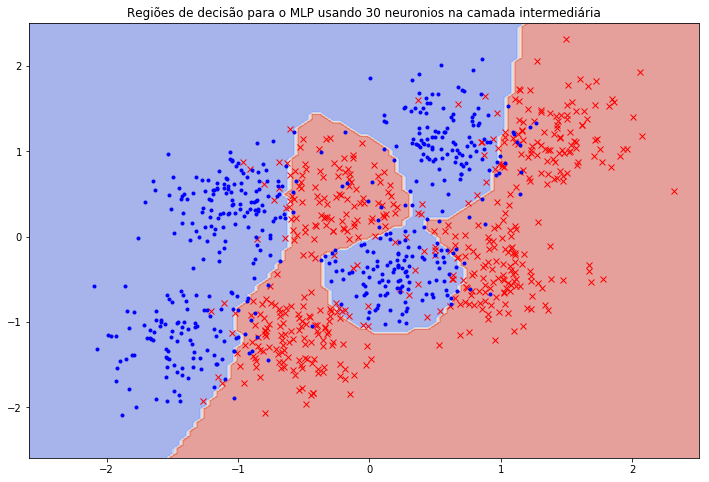

In [58]:
X_test_t = torch.FloatTensor(X_teste)
y_hat_test = model(X_test_t)
y_hat_test_class = np.where(y_hat_test.detach().numpy()<0.5, 0, 1)
test_accuracy = np.sum(y_teste.reshape(-1,1)==y_hat_test_class) / len(y_teste)
print("Acurácia de teste {:.2f}".format(test_accuracy))


x_min, x_max = X_treino[:, 0].min()-0.3, X_treino[:, 0].max()+0.3
y_min, y_max = X_treino[:, 1].min()-0.3, X_treino[:, 1].max()+0.3


spacing = min(x_max - x_min, y_max - y_min) / 100


XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
               np.arange(y_min, y_max, spacing))


data = np.hstack((XX.ravel().reshape(-1,1), 
                  YY.ravel().reshape(-1,1)))


data_t = torch.FloatTensor(data)
db_prob = model(data_t)

clf = np.where(db_prob<0.5,0,1)

Z = clf.reshape(XX.shape)

plt.figure(figsize=(12,8))
plt.title("Regiões de decisão para o MLP usando {} neuronios na camada intermediária".format(H))
plt.contourf(XX, YY, Z, cmap=plt.cm.coolwarm, alpha=0.5)
plt.plot(X_teste[np.in1d(y_teste, 1), 0], X_teste[np.in1d(y_teste, 1), 1], 'rx')
plt.plot(X_teste[np.in1d(y_teste, 0), 0], X_teste[np.in1d(y_teste, 0), 1], 'b.')
plt.savefig(os.path.join(pst_imagens, 'mlp_regioes_h_{}.png'.format(H)), bbox_inches='tight')
plt.show()

## SVM

In [61]:
clf = SVC(gamma='scale')
clf.fit(X_treino, y_treino.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
y_pred = clf.predict(X_val)
accuracy_score(y_pred, y_val)

0.853

===
SVM com C = 1 e kernel = linear
Acurácia: 0.658, F1-score: 0.667, AUC: 0.658


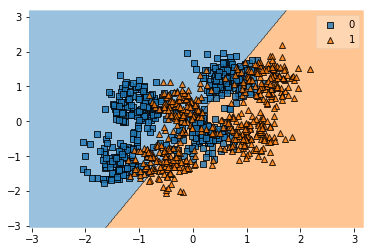

===
SVM com C = 10 e kernel = linear
Acurácia: 0.661, F1-score: 0.670, AUC: 0.661


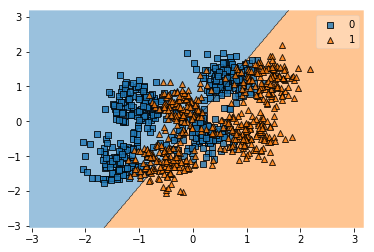

===
SVM com C = 50 e kernel = linear
Acurácia: 0.661, F1-score: 0.670, AUC: 0.661


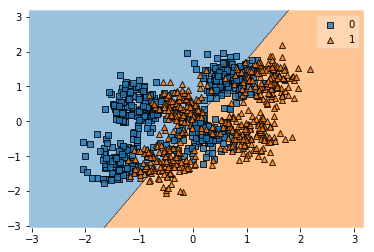

===
SVM com C = 100 e kernel = linear
Acurácia: 0.661, F1-score: 0.670, AUC: 0.661


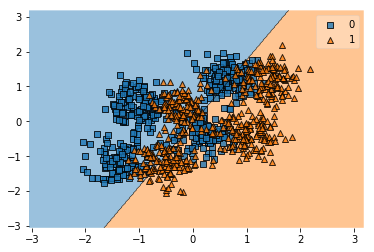

===
SVM com C = 1 e kernel = poly
Acurácia: 0.743, F1-score: 0.726, AUC: 0.746


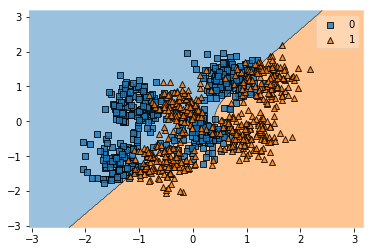

===
SVM com C = 10 e kernel = poly
Acurácia: 0.75, F1-score: 0.731, AUC: 0.754


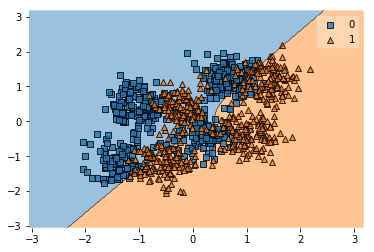

===
SVM com C = 50 e kernel = poly
Acurácia: 0.752, F1-score: 0.732, AUC: 0.756


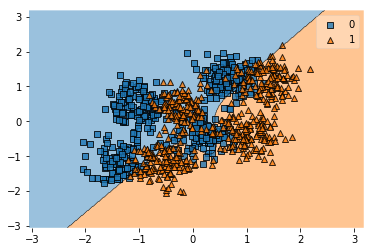

===
SVM com C = 100 e kernel = poly
Acurácia: 0.752, F1-score: 0.732, AUC: 0.756


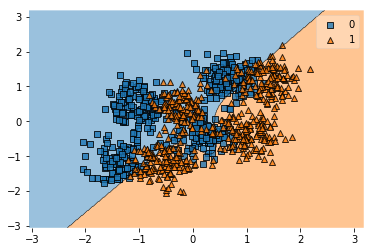

===
SVM com C = 1 e kernel = rbf
Acurácia: 0.853, F1-score: 0.858, AUC: 0.853


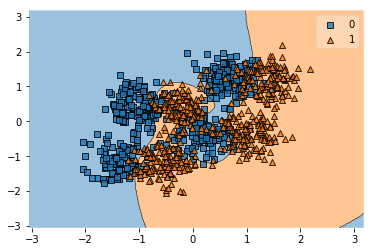

===
SVM com C = 10 e kernel = rbf
Acurácia: 0.864, F1-score: 0.868, AUC: 0.864


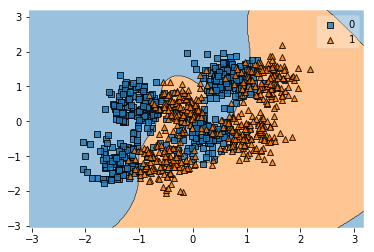

===
SVM com C = 50 e kernel = rbf
Acurácia: 0.867, F1-score: 0.871, AUC: 0.867


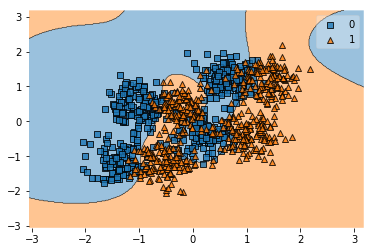

===
SVM com C = 100 e kernel = rbf
Acurácia: 0.866, F1-score: 0.870, AUC: 0.866


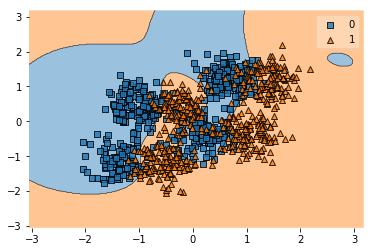

===
SVM com C = 1 e kernel = sigmoid
Acurácia: 0.415, F1-score: 0.421, AUC: 0.415


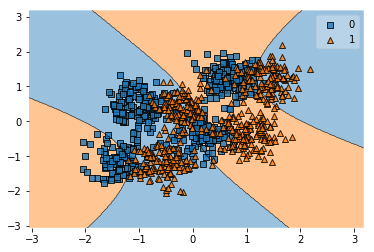

===
SVM com C = 10 e kernel = sigmoid
Acurácia: 0.413, F1-score: 0.421, AUC: 0.413


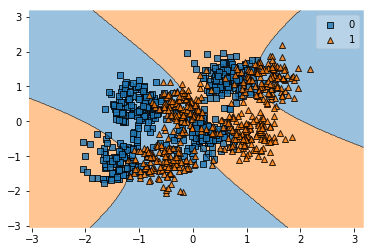

===
SVM com C = 50 e kernel = sigmoid
Acurácia: 0.414, F1-score: 0.422, AUC: 0.414


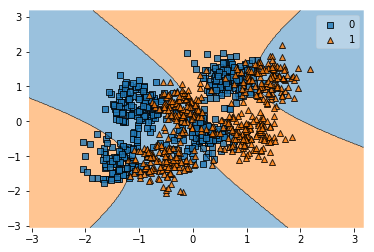

===
SVM com C = 100 e kernel = sigmoid
Acurácia: 0.414, F1-score: 0.422, AUC: 0.414


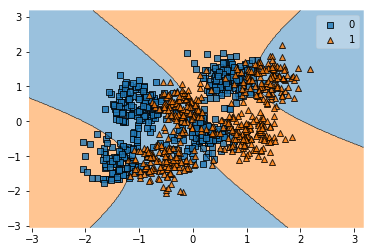

In [63]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in [1, 10, 50, 100]:
        clf = SVC(C=c, kernel=kernel, gamma='scale')
        clf.fit(X_treino, y_treino.ravel())
        
        y_pred = clf.predict(X_val)
        ac = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        auc_score = roc_auc_score(y_val, y_pred)
        
        print('===')
        print('SVM com C =', c, 'e kernel =', kernel)
        print('Acurácia: {}, F1-score: {:.3f}, AUC: {:.3f}'.format(ac, f1, auc_score))
        
        plot_decision_regions(X_val, y_val.ravel(), clf=clf)
        plt.savefig(os.path.join(pst_imagens, 'regions_svm_{}_{}.png'.format(c, kernel)), bbox_inches='tight')
        plt.show()

===
SVM com C = 50 e kernel = rbf
Acurácia: 0.874, F1-score: 0.873, AUC: 0.874


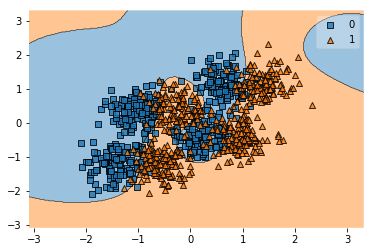